In [1]:
using Pkg
Pkg.add("StaticArrays")
Pkg.add("LinearAlgebra")
Pkg.add("Combinatorics")
Pkg.add("Ripserer")
Pkg.add("Plots")
Pkg.add("Random")
Pkg.add("MultivariateStats")
Pkg.add("MLDatasets")
using StaticArrays
using LinearAlgebra
using Combinatorics
using Ripserer
using Plots
using Random
using MultivariateStats
using MLDatasets


    Updating registry at `~/.julia/registries/General.toml`
┌ Warning: could not download https://pkg.julialang.org/registries
│   exception = Downloads.RequestError("https://pkg.julialang.org/registries", 6, "Could not resolve host: pkg.julialang.org", Downloads.Response(nothing, "https://pkg.julialang.org/registries", 0, "", Pair{String, String}[]))
└ @ Pkg.Registry /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.7/Pkg/src/Registry/Registry.jl:82
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environme

In [2]:
SPoint = SVector{2, Float64}
function circle_distance(x::Float64, y::Float64)::Float64
    real_distance::Float64 = abs(x - y)
    return minimum([real_distance, 2 - real_distance])
end

function torus_distance(x::SPoint, y::SPoint)::Float64
    first_circle_distance::Float64 = circle_distance(x[1], y[1])
    second_circle_distance::Float64 = circle_distance(x[2], y[2])
    return norm([first_circle_distance, second_circle_distance])
end

function matrix_index(indexies:: Tuple{Int64, Int64};matrix_size::Tuple{Int64, Int64}):: Int64
    i:: Int64, j:: Int64 = indexies
    row:: Int64, column:: Int64 = matrix_size
    index:: Int64 = (j - 1) * row + i
    if (i > row) || (j > column)
        throw(DomainError(index, "Make sure that each index <= row , column"))
    end
    return index
end

function distance_matrix(pointcloud:: Vector{SPoint}):: Array{Float64, 2}
    point_num:: Int64 = size(pointcloud, 1)
    indexcombs::Base.Generator{Combinatorics.Combinations,Combinatorics.var"#10#13"{Combinatorics.var"#reorder#11"{UnitRange{Int64}}}} = combinations(1:point_num, 2)
    dist_matrix:: Array{Float64, 2} = zeros(point_num, point_num)
    for indexies = indexcombs
        i::Int64, j:: Int64 = reverse(Tuple(indexies))
        #dist_matrix[matrix_index((i, j), matrix_size=(point_num, point_num))] = torus_distance(pointcloud[i], pointcloud[j])
        dist_matrix[i,j] = torus_distance(pointcloud[i], pointcloud[j])
    end
    #return map(points:: Vector{SPoint}-> distance_in_klein_bottle(points[1], points[2])::Float64, combs)
    return dist_matrix + transpose(dist_matrix)
end


distance_matrix (generic function with 1 method)

In [3]:
function staticalize(ndarray:: Union{Array{Float64, 2}, Matrix{Float64}})::Vector{SPoint}
    rownum ::Int = size(ndarray, 1)
    return [SPoint(ndarray[i,:]) for i = 1:rownum]
end

function uniformpoints_in_square(;range_min:: Float64, range_max:: Float64, sampling:: Int64, step:: Float64 = 0.00001)::Array{Float64,}
    rng = range_min:step:range_max
    dim:: Int64 = 2
    return rand(rng, (sampling, dim))
end


uniformpoints_in_square (generic function with 1 method)

In [4]:
pointcloud = uniformpoints_in_square(;range_min=-1.0, range_max=1.0, sampling=500)
staticpointcloud = staticalize(pointcloud)

500-element Vector{SVector{2, Float64}}:
 [0.3725, 0.79783]
 [-0.98512, -0.76096]
 [-0.9269, 0.964]
 [0.17656, -0.56373]
 [0.55004, -0.4522]
 [-0.32452, -0.34934]
 [-0.27685, 0.04738]
 [0.38831, -0.09325]
 [0.37961, 0.27181]
 [0.78695, -0.66915]
 [0.02201, 0.01288]
 [0.26473, 0.98112]
 [0.17472, 0.74784]
 ⋮
 [-0.0225, 0.41127]
 [0.95303, 0.80374]
 [-0.34041, -0.98852]
 [0.08392, -0.43817]
 [-0.28014, 0.84549]
 [-0.30323, 0.11176]
 [0.90007, -0.83746]
 [0.66674, -0.41612]
 [0.3885, -0.76298]
 [-0.11774, 0.45681]
 [0.30772, -0.52744]
 [0.38962, 0.03887]

In [5]:
distmat = distance_matrix(staticpointcloud)

500×500 Matrix{Float64}:
 0.0       0.779306  0.720037  0.667831  …  0.597185  0.677833  0.759153
 0.779306  0.0       0.281134  0.861209     1.168     0.744719  1.01522
 0.720037  0.281134  0.0       1.01332      0.954977  0.918934  1.15022
 0.667831  0.861209  1.01332   0.0          1.02272   0.136088  0.639157
 0.770698  0.55804   0.783846  0.389777     1.12793   0.253732  0.516608
 1.10143   0.778347  0.913435  0.545018  …  0.832247  0.656846  0.812836
 0.992386  1.07474   1.12372   0.760944     0.43926   0.819842  0.666524
 0.89122   0.915656  1.16521   0.515936     0.747431  0.441606  0.132126
 0.526068  1.1572    0.979824  0.859858     0.530643  0.802477  0.233155
 0.675188  0.245726  0.465253  0.619427     1.25794   0.499743  0.811889
 0.859645  1.25882   1.34353   0.596963  …  0.465407  0.611209  0.368528
 0.212625  0.793251  0.808551  0.463611     0.648987  0.493317  0.950491
 0.204     0.973214  0.924019  0.688432     0.412591  0.736823  0.740824
 ⋮                          

In [6]:
distmat = distance_matrix(staticpointcloud)

500×500 Matrix{Float64}:
 0.0       0.779306  0.720037  0.667831  …  0.597185  0.677833  0.759153
 0.779306  0.0       0.281134  0.861209     1.168     0.744719  1.01522
 0.720037  0.281134  0.0       1.01332      0.954977  0.918934  1.15022
 0.667831  0.861209  1.01332   0.0          1.02272   0.136088  0.639157
 0.770698  0.55804   0.783846  0.389777     1.12793   0.253732  0.516608
 1.10143   0.778347  0.913435  0.545018  …  0.832247  0.656846  0.812836
 0.992386  1.07474   1.12372   0.760944     0.43926   0.819842  0.666524
 0.89122   0.915656  1.16521   0.515936     0.747431  0.441606  0.132126
 0.526068  1.1572    0.979824  0.859858     0.530643  0.802477  0.233155
 0.675188  0.245726  0.465253  0.619427     1.25794   0.499743  0.811889
 0.859645  1.25882   1.34353   0.596963  …  0.465407  0.611209  0.368528
 0.212625  0.793251  0.808551  0.463611     0.648987  0.493317  0.950491
 0.204     0.973214  0.924019  0.688432     0.412591  0.736823  0.740824
 ⋮                          

In [7]:
torus_vrip_fill = Rips(distmat; threshold=nothing)
torus_vrips_co = ripserer(torus_vrip_fill; dim_max=2, reps=true)

3-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 500-element 0-dimensional PersistenceDiagram
 137-element 1-dimensional PersistenceDiagram
 134-element 2-dimensional PersistenceDiagram

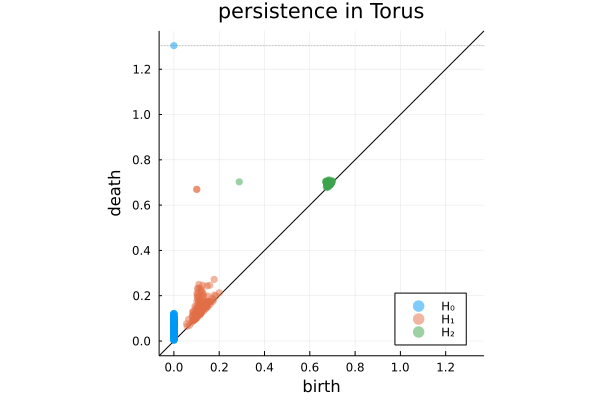

In [8]:
plot(torus_vrips_co; title="persistence in Torus")

In [9]:
function plotting_cycle(;pointcloud, cohomology, legend=nothing)
    filtration = cohomology[2].filtration
    most_persistent_co = cohomology[2][end]
    reconstructed_at_birth_most = reconstruct_cycle(filtration, most_persistent_co)
    second_persistent_co = cohomology[2][end - 1]
    reconstructed_at_birth_second = reconstruct_cycle(filtration, second_persistent_co)
    common_cycle = intersect(reconstructed_at_birth_most, reconstructed_at_birth_second)
    println(common_cycle)
    num_point = size(pointcloud, 1)
    x = pointcloud[1:num_point]
    y = pointcloud[num_point + 1:end]
    scatter(x,y; label="data", markersize=2, legend = legend)
    plot!(reconstructed_at_birth_most, x, y; label="most_persistent", color="blue")
    plot!(reconstructed_at_birth_second, x, y; label="second_persistent", color="red")
    if !isempty(common_cycle)
        plot!(common_cycle, x, y; label="intersect", color="green")
    end
    plot!()
end

plotting_cycle (generic function with 1 method)

Simplex{1, Float64, Int64}[]


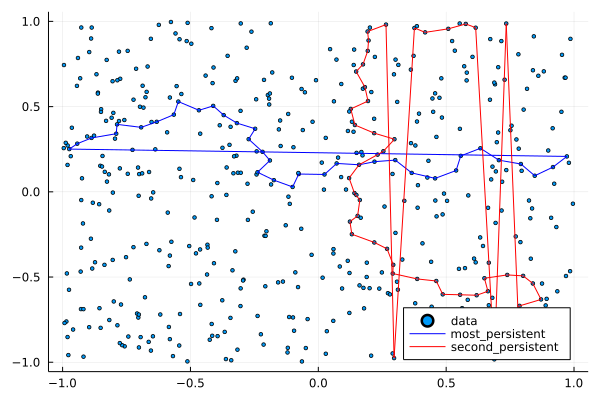

In [10]:
plotting_cycle(;pointcloud = pointcloud, cohomology=torus_vrips_co, legend= :bottomright)

In [11]:
function randn_poitns(;num_point:: Int64, dim:: Int64=2)::Array{Float64, 2}
    rng = MersenneTwister()
    randompoints = randn(rng, (num_point, dim))
    max_range = maximum(map(point -> norm(point), randompoints))
    randompoints = randompoints / max_range
end

randn_poitns (generic function with 1 method)

In [12]:
pointcloud=randn_poitns(;num_point=500)
staticpointcloud=staticalize(pointcloud)

500-element Vector{SVector{2, Float64}}:
 [0.18198650769700903, 0.12497030055875859]
 [-0.4415538425949823, -0.15717954739037918]
 [0.10311858894977138, -0.2334730003411773]
 [-0.14417350925377664, 0.0961227365700427]
 [-0.39589807670103466, -0.26101603115237215]
 [0.3529771596834536, 0.17920935658940101]
 [0.12004302417121329, 0.11210300911357582]
 [-0.15633296076691144, 0.31538472568086007]
 [0.24820986138202297, -0.2003410472577374]
 [0.48931400343821113, -0.0721205748465803]
 [-0.07818716795127967, 0.39505249066683235]
 [0.24080694984527554, -0.12614178315870664]
 [0.0751420433945919, 0.18119705036089426]
 ⋮
 [-0.4098898516371692, -0.2859679799266554]
 [-0.38570995122392715, -0.2981248310910798]
 [0.00688297712132614, -0.1377040472098696]
 [0.0421659889480286, -0.4258643295937924]
 [-0.433064021099992, -0.27964548386391963]
 [0.12279868166630292, 0.15749176654733482]
 [-0.058247024381803784, -0.14509322268350985]
 [-0.18622309844286083, -0.3329837570359944]
 [0.37605682789087436, 0

In [13]:
distmat = distance_matrix(staticpointcloud)

500×500 Matrix{Float64}:
 0.0        0.684406  0.367017  0.327433  …  0.295071   0.366906  0.140585
 0.684406   0.0       0.54999   0.390637     0.679772   1.03139   0.796603
 0.367017   0.54999   0.0       0.412052     0.151559   0.709262  0.384431
 0.327433   0.390637  0.412052  0.0          0.46284    0.646746  0.46133
 0.694936   0.11343   0.499776  0.436936     0.641348   1.05462   0.792883
 0.179387   0.862808  0.482427  0.504046  …  0.362566   0.230286  0.0999544
 0.0632658  0.62282   0.34599   0.264699     0.300959   0.419702  0.198731
 0.388224   0.551967  0.607091  0.219599     0.621386   0.590411  0.526053
 0.331983   0.691113  0.148826  0.491788     0.0370249  0.623728  0.294437
 0.365096   0.934746  0.418547  0.655448     0.267659   0.472835  0.233793
 0.375013   0.661056  0.654153  0.306126  …  0.64297    0.50663   0.501757
 0.257909   0.683066  0.17458   0.444535     0.0386493  0.555566  0.225365
 0.120736   0.617635  0.415613  0.235238     0.382395   0.413879  0.259982


In [14]:
torus_vrip_fill = Rips(distmat; threshold=nothing)
torus_vrips_co = ripserer(torus_vrip_fill; dim_max=2, reps=true)


3-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 500-element 0-dimensional PersistenceDiagram
 134-element 1-dimensional PersistenceDiagram
 12-element 2-dimensional PersistenceDiagram

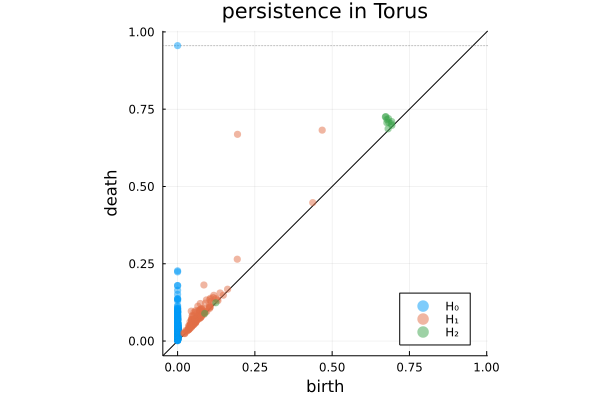

In [15]:
plot(torus_vrips_co; title="persistence in Torus")

Simplex{1, Float64, Int64}[]


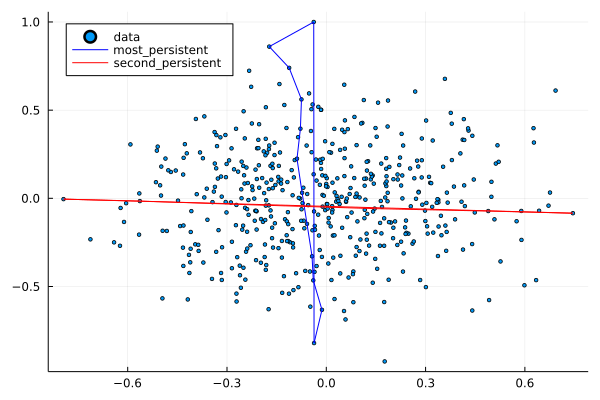

In [16]:
plotting_cycle(;pointcloud=pointcloud, cohomology=torus_vrips_co, legend=:topleft)

In [17]:
train_x, train_y = MNIST.traindata(Float64)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; … ;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0;;; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

In [18]:
test_image_x = train_x[:,:, 1]
findall(x->x>0, test_image_x)

166-element Vector{CartesianIndex{2}}:
 CartesianIndex(13, 6)
 CartesianIndex(14, 6)
 CartesianIndex(15, 6)
 CartesianIndex(16, 6)
 CartesianIndex(17, 6)
 CartesianIndex(18, 6)
 CartesianIndex(19, 6)
 CartesianIndex(20, 6)
 CartesianIndex(21, 6)
 CartesianIndex(22, 6)
 CartesianIndex(23, 6)
 CartesianIndex(24, 6)
 CartesianIndex(9, 7)
 ⋮
 CartesianIndex(11, 24)
 CartesianIndex(12, 24)
 CartesianIndex(13, 24)
 CartesianIndex(14, 24)
 CartesianIndex(5, 25)
 CartesianIndex(6, 25)
 CartesianIndex(7, 25)
 CartesianIndex(8, 25)
 CartesianIndex(9, 25)
 CartesianIndex(10, 25)
 CartesianIndex(11, 25)
 CartesianIndex(12, 25)

In [19]:
function mnist_index_to_codinate(index ::Tuple{Int64,Int64})::Tuple{Float64, Float64}
    x, y = index
    return (2.0 * x - 29.0)/27.0, (- 2.0 * y + 29.0)/27.0
end

mnist_index_to_codinate (generic function with 1 method)

In [20]:
function tuple_list_to_Array(tuple_list::Vector{Tuple{Float64, Float64, Float64}})::Matrix{Float64}
    len::Int64 = length(tuple_list)
    dim::Int64 = length(tuple_list[1])
    result::Matrix{Float64} = zeros(len, dim)
    for i=1:dim
        result[len * (i - 1) + 1 : len * i] = map(tuple-> tuple[i], tuple_list)
    end
    return result
end


tuple_list_to_Array (generic function with 1 method)

In [61]:
function mnist_image_to_pointcloud(image ::Matrix{Float64}; epsilon::Float64)
    indexies = map(x-> Tuple(x), findall(x->x>epsilon, image))
    result = map(indexies) do index
        x, y= mnist_index_to_codinate(index)
        z = image[index[1], index[2]]
        return x, y, z
    end
    return tuple_list_to_Array(result)
end

mnist_image_to_pointcloud (generic function with 1 method)

In [22]:
test_image_x

28×28 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0        0.0  0.0  0.0
 ⋮

In [98]:
pointcloud = mnist_image_to_pointcloud(test_image_x;epsilon = 0.5)

111×3 Matrix{Float64}:
  0.259259   0.62963   0.533333
  0.333333   0.62963   0.686275
  0.481481   0.62963   0.65098
  0.555556   0.62963   1.0
  0.62963    0.62963   0.968627
 -0.185185   0.555556  0.603922
 -0.111111   0.555556  0.666667
 -0.037037   0.555556  0.992157
  0.037037   0.555556  0.992157
  0.111111   0.555556  0.992157
  0.185185   0.555556  0.992157
  0.259259   0.555556  0.992157
  0.333333   0.555556  0.882353
  ⋮                    
 -0.407407  -0.703704  0.992157
 -0.333333  -0.703704  0.992157
 -0.259259  -0.703704  0.992157
 -0.185185  -0.703704  0.956863
 -0.111111  -0.703704  0.521569
 -0.703704  -0.777778  0.533333
 -0.62963   -0.777778  0.992157
 -0.555556  -0.777778  0.992157
 -0.481481  -0.777778  0.992157
 -0.407407  -0.777778  0.831373
 -0.333333  -0.777778  0.529412
 -0.259259  -0.777778  0.517647

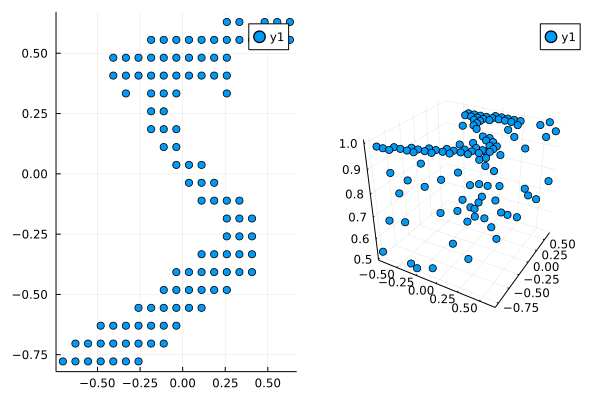

In [99]:
num_point = size(pointcloud, 1)
x = pointcloud[1:num_point]
y = pointcloud[num_point + 1:num_point*2]
z = pointcloud[num_point*2+1:end]
plot(scatter(x, y), scatter(x, y, z))

In [100]:
M = fit(PCA, transpose(pointcloud);maxoutdim=2)
train_x = Matrix(pointcloud)'
pointcloud_pca = transpose(predict(M, train_x))
num_point = size(pointcloud_pca, 1)
train_x = pointcloud_pca[1:num_point]
train_y =pointcloud_pca[num_point + 1: end]


111-element Vector{Float64}:
  0.02109691143328054
  0.09428436275071433
  0.23407514408646118
  0.3110465731620104
  0.38067708538681566
 -0.37546534836885825
 -0.3040185268201575
 -0.22750117507558223
 -0.15726522640947843
 -0.0870292777433746
 -0.016793329077270814
  0.053442619588832986
  0.12155954071039218
  ⋮
 -0.1793305149795394
 -0.1090945663134356
 -0.038858617647331804
  0.030696215022311235
  0.09253173306539891
 -0.44563761739638214
 -0.3665471607762884
 -0.2963112121101846
 -0.22607526344408077
 -0.15894217653963152
 -0.09453355362102543
 -0.02452464362040855

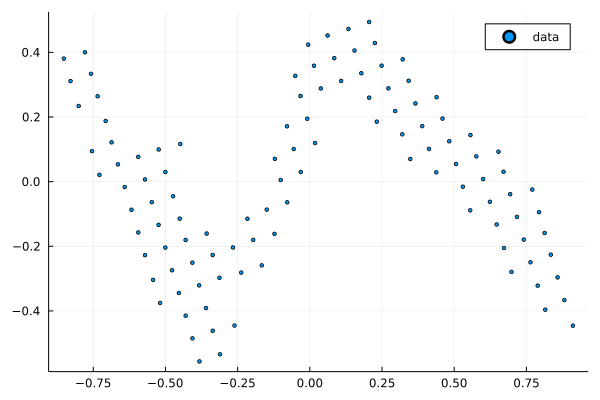

In [101]:

scatter(train_x,train_y; label="data", markersize=2)

In [102]:
pointcloud_dim2 = zeros(num_point, 2)
pointcloud_dim2[1:num_point] = x
pointcloud_dim2[num_point + 1: end] = y
pointcloud_dim2

111×2 Matrix{Float64}:
  0.259259   0.62963
  0.333333   0.62963
  0.481481   0.62963
  0.555556   0.62963
  0.62963    0.62963
 -0.185185   0.555556
 -0.111111   0.555556
 -0.037037   0.555556
  0.037037   0.555556
  0.111111   0.555556
  0.185185   0.555556
  0.259259   0.555556
  0.333333   0.555556
  ⋮         
 -0.407407  -0.703704
 -0.333333  -0.703704
 -0.259259  -0.703704
 -0.185185  -0.703704
 -0.111111  -0.703704
 -0.703704  -0.777778
 -0.62963   -0.777778
 -0.555556  -0.777778
 -0.481481  -0.777778
 -0.407407  -0.777778
 -0.333333  -0.777778
 -0.259259  -0.777778

In [107]:
staticpointcloud = staticalize(Matrix(pointcloud_pca))
distmat = distance_matrix(staticpointcloud)

111×111 Matrix{Float64}:
 0.0        0.0775164  0.224824   …  0.49214    0.491223   0.50281
 0.0775164  0.0        0.147313      0.501164   0.489741   0.489822
 0.224824   0.147313   0.0           0.550878   0.521859   0.500675
 0.306777   0.229261   0.0819717     0.590698   0.553882   0.522525
 0.380119   0.302604   0.1553        0.635026   0.592669   0.553785
 0.448801   0.52556    0.67168    …  0.702378   0.742744   0.792788
 0.374473   0.45091    0.596678      0.65999    0.695539   0.741269
 0.294532   0.370425   0.51569       0.619778   0.649133   0.68925
 0.223375   0.298131   0.442476      0.592502   0.615101   0.648931
 0.154958   0.226976   0.369597      0.57355    0.588467   0.61492
 0.0953732  0.158499   0.297301   …  0.563764   0.570267   0.588311
 0.0717527  0.0984605  0.226145      0.563621   0.561324   0.570141
 0.108911   0.0728942  0.160226      0.573379   0.56263    0.562108
 ⋮                                ⋱                        ⋮
 0.567049   0.574277   0.617304  

In [108]:
torus_vrip_fill = Rips(distmat; threshold=nothing)
torus_vrips_co = ripserer(torus_vrip_fill; dim_max=2, reps=true)

3-element Vector{PersistenceDiagrams.PersistenceDiagram}:
 111-element 0-dimensional PersistenceDiagram
 56-element 1-dimensional PersistenceDiagram
 6-element 2-dimensional PersistenceDiagram

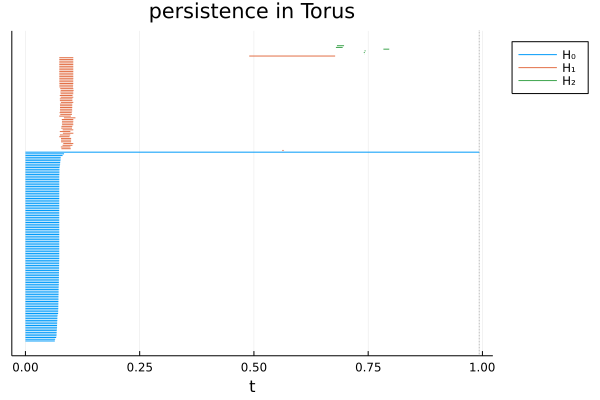

In [109]:
barcode(torus_vrips_co; title="persistence in Torus")

Simplex{1, Float64, Int64}[]


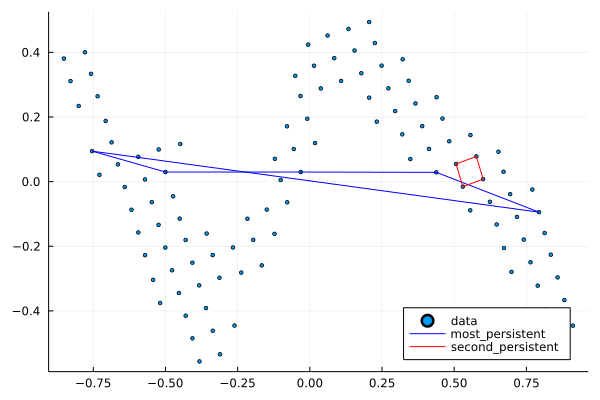

In [110]:
plotting_cycle(;pointcloud = Matrix(pointcloud_pca), cohomology=torus_vrips_co, legend= :bottomright)

In [111]:
train_x

111-element Vector{Float64}:
 -0.728630445551774
 -0.7541723076065282
 -0.8006455764305443
 -0.8288371254309836
 -0.8518882817567938
 -0.5184849527332136
 -0.5428079587929526
 -0.5706815453599098
 -0.5941566515970296
 -0.6176317578341493
 -0.641106864071269
 -0.6645819703083888
 -0.6865732518559249
  ⋮
  0.7409226116625897
  0.7174475054254699
  0.6939723991883501
  0.6709742366014537
  0.6533814353837549
  0.9112720467602601
  0.8815966730702373
  0.8581215668331175
  0.8346464605959977
  0.8133440976543397
  0.793949509313575
  0.7706333842931964

In [31]:
function image_of_label(train_x, train_y, label::Int64)
    indexies_image_of_label = findall(x-> x == label, train_y)
    return [train_x[:,:,i] for i=indexies_image_of_label]
end

image_of_label (generic function with 1 method)

In [32]:
image_of_5 = image_of_label(train_x, train_y, 5)

5421-element Vector{Matrix{Float64}}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.

In [33]:
function MNIST_PCA_Torus(image_list)
    map(image_list) do image
        pointcloud = mnist_image_to_pointcloud(image)
        M = fit(PCA, transpose(pointcloud);maxoutdim=2)
        x = Matrix(pointcloud)'
        pointcloud_pca = transpose(predict(M, x))
        staticpointcloud = staticalize(Matrix(pointcloud_pca))
        distmat = distance_matrix(staticpointcloud)
        torus_vrip_fill = Rips(distmat; threshold=nothing)
        torus_vrips_co = ripserer(torus_vrip_fill; dim_max=2, reps=true)
    end
end

        

MNIST_PCA_Torus (generic function with 1 method)

In [34]:
chomologys = MNIST_PCA_Torus(image_of_5[1:300])

300-element Vector{Vector{PersistenceDiagrams.PersistenceDiagram}}:
 [166-element 0-dimensional PersistenceDiagram, 31-element 1-dimensional PersistenceDiagram, 22-element 2-dimensional PersistenceDiagram]
 [91-element 0-dimensional PersistenceDiagram, 19-element 1-dimensional PersistenceDiagram, 7-element 2-dimensional PersistenceDiagram]
 [98-element 0-dimensional PersistenceDiagram, 22-element 1-dimensional PersistenceDiagram, 9-element 2-dimensional PersistenceDiagram]
 [111-element 0-dimensional PersistenceDiagram, 15-element 1-dimensional PersistenceDiagram, 14-element 2-dimensional PersistenceDiagram]
 [103-element 0-dimensional PersistenceDiagram, 21-element 1-dimensional PersistenceDiagram, 12-element 2-dimensional PersistenceDiagram]
 [106-element 0-dimensional PersistenceDiagram, 17-element 1-dimensional PersistenceDiagram, 5-element 2-dimensional PersistenceDiagram]
 [102-element 0-dimensional PersistenceDiagram, 18-element 1-dimensional PersistenceDiagram, 8-element 2-dime

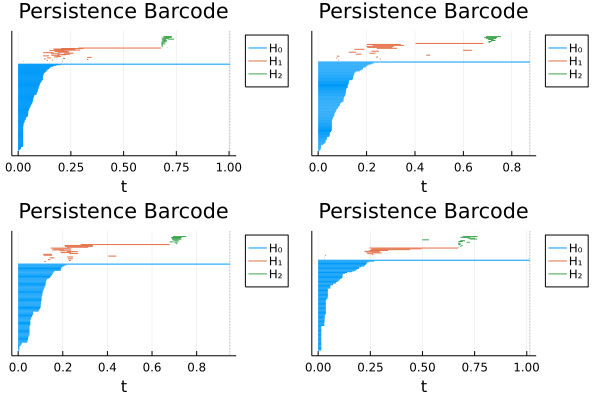

In [35]:
plot(barcode(chomologys[1]), barcode(chomologys[2]), barcode(chomologys[3]), barcode(chomologys[4]))


### 角度統計との交わりについて

二次元の角度データはトーラス上の点として同一視される.
トーラス上の点データ群は,ある部分集合$A$を近似しているはず.
通常の平面上でパーシステントホモロジーを計算してもそれが必ずしもトーラス上での形状とは一致しない.
そこで2次元角度データ群$X$にトーラス上での距離$d$を適切に定義し,そのヴィートリスリップスでのホモロジーを計算することで,近似された部分集合$A$を特定することを考える.

閉区間$I = [-1, 1]$を$S^1$へ変換する一つの方法は,$I$上に同値関係$-1 \sim 1, x \sim x (x \in I)$による商位相空間を構成するものである.$S^1$とは同相写像$p:I/\sim \longrightarrow S^1$を$p([x]) = e^{i\pi x}$を定めることができるから,$p$は元々射影$p:I \longrightarrow S^1$であると考えて問題ない.複素数$e^{i \pi x}$の偏角は$\pi x$であることを考えると,閉区間$I$を角度のデータに変換するには単純に$I$の要素を$\pi$倍することで得られることがわかる.
$S^1$上には距離$d(e^{i\theta_1}, e^{i \theta_2})$について考える.偏角の差の絶対値$d = | \theta_1 - \theta_2 |$は$0 \leq d \leq \pi$となる場合と$\pi < d < 2\pi$

